<a href="https://colab.research.google.com/github/RAJAGOPALAN-GANGADHARAN/Fashion_MNIST/blob/master/notebook_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.3MB 2.7MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
import tensorflow_datasets as tfds

In [5]:
dataset,metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteSSP4S1/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteSSP4S1/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [0]:
train,test=dataset['train'],dataset['test']
train_len=metadata.splits['train'].num_examples
test_len=metadata.splits['test'].num_examples

In [8]:
print(train_len,test_len)

60000 10000


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

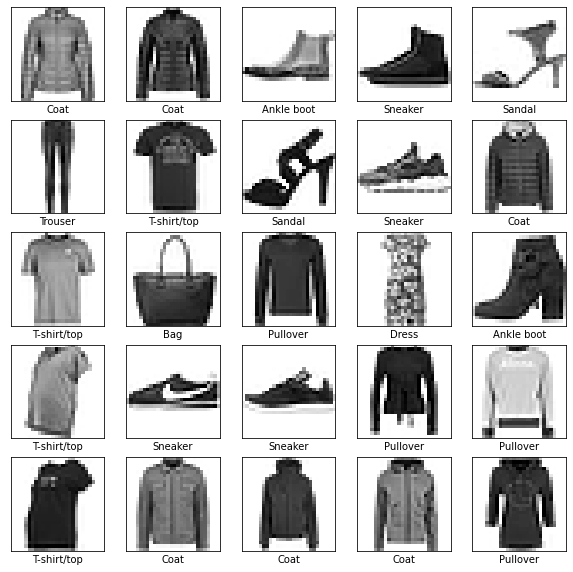

In [17]:
plt.figure(figsize=(10,10))
i=0
for (image,label) in test.take(25):
  image=image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1


In [0]:
conv1 = tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1))
maxp1=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)
conv2=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu)
maxp2=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)
inp = tf.keras.layers.Flatten()
hidden = tf.keras.layers.Dense(128,activation=tf.nn.relu)
output = tf.keras.layers.Dense(10,activation=tf.nn.softmax)

In [0]:
model=tf.keras.Sequential([conv1,maxp1,conv2,maxp2,inp,hidden,output])

In [0]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
def normalize(data,label):
  data = tf.cast(data,dtype=np.float32)
  data/=255
  return data,label

test = test.map(normalize)
train=train.map(normalize)
BS=32
test=test.cache().repeat().shuffle(train_len).batch(BS)
train=train.cache().cache().batch(BS)
#model.fit(train,epochs=10,steps_per_epoch=)

In [24]:
model.fit(train,epochs=10,steps_per_epoch=math.ceil(train_len/BS))

Epoch 1/10
1875/1875 [==============================] - 22s 12ms/step - loss: 1.8106 - accuracy: 0.6593
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6959 - accuracy: 0.7668
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6830 - accuracy: 0.7793
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6723 - accuracy: 0.7891
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6616 - accuracy: 0.8004
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6409 - accuracy: 0.8215
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6277 - accuracy: 0.8349
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6206 - accuracy: 0.8419
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6139 - accuracy: 0.8487
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - 

In [26]:
test_loss, test_accuracy = model.evaluate(test, steps=math.ceil(test_len/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.6175 - accuracy: 0.8453
Accuracy on test dataset: 0.8453474640846252


In [31]:
for data,label in test.take(1):
  data=data.numpy()
  label=label.numpy()
  predictions=model.predict(data)
  print(class_names[np.argmax(predictions[0])],class_names[label[0]])

Trouser Trouser


In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

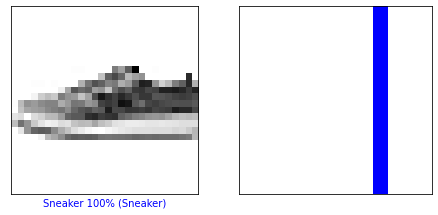

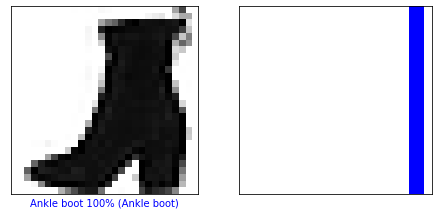

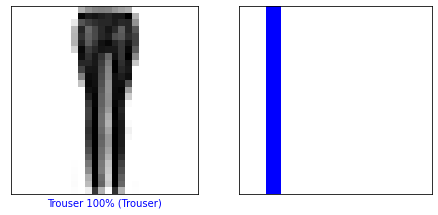

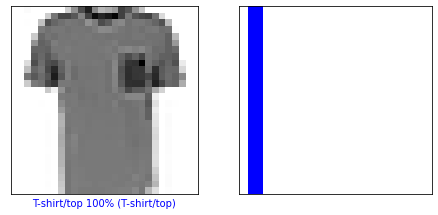

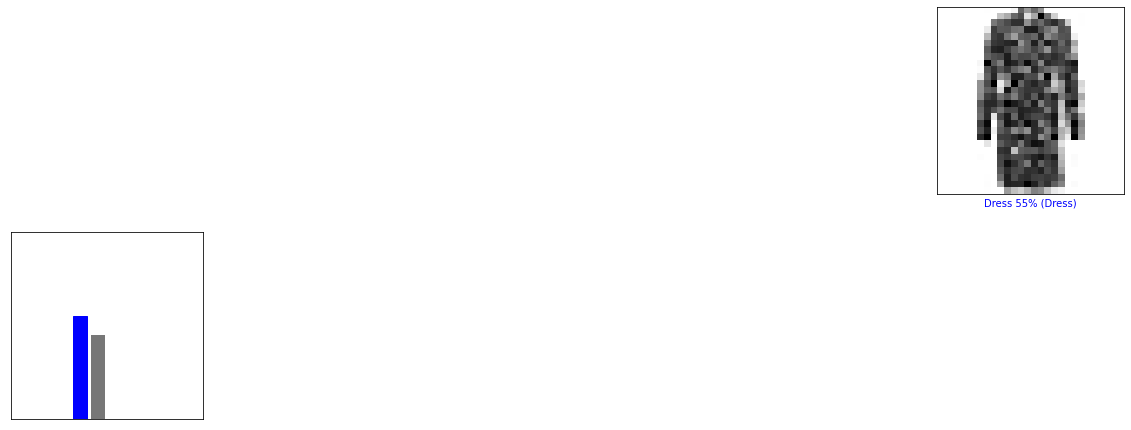

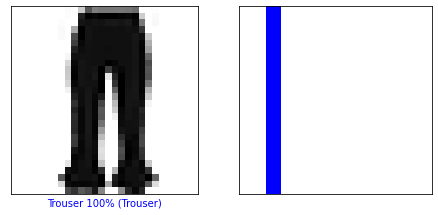

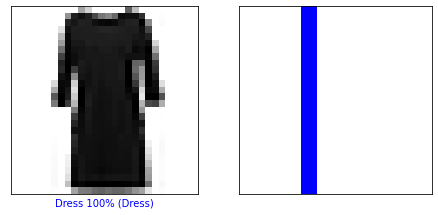

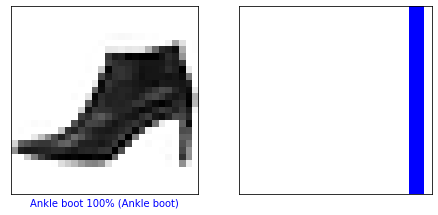

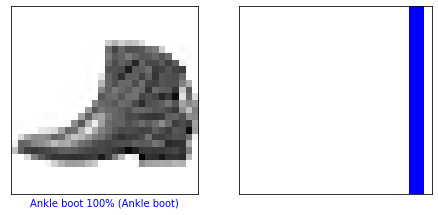

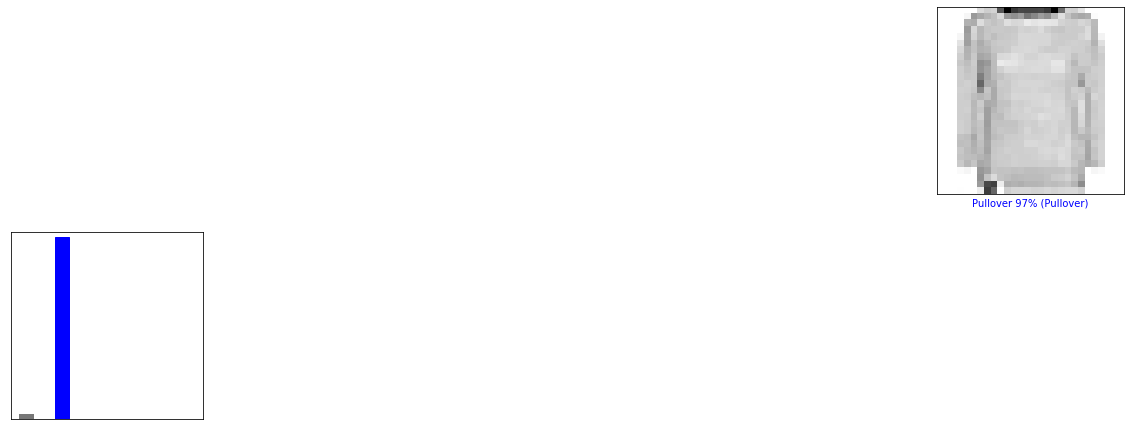

In [39]:
i=0
for test_images, test_labels in test.take(10):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
  plt.figure(figsize=(20,20))
  plt.subplot(5,5,i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(5,5,i+2)
  plot_value_array(i, predictions, test_labels)
  i+=1